In [ ]:
from  google.colab import files
uploaded = files.upload()

Saving salesweekly.csv to salesweekly.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import warnings
from prophet import Prophet


df = pd.read_csv('salesweekly.csv')

M01AB= {
    'series':'M01AB',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[10,30,50],
               'interval_width':[0.0005]
              }
}
M01AE= {
    'series':'M01AE',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],
               'interval_width':[0.0005]
              }
}
N02BA= {
    'series':'N02BA',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.005,0.01,0.05,0.1],
                   'interval_width':[0.0005]
              }
}
N02BE= {
    'series':'N02BE',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[5,10,50],'seasonality_prior_scale':[150,170,200],
               'interval_width':[0.0005]
              }
}
N05B= {
    'series':'N05B',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[1,5,10],
               'interval_width':[0.0005]
              }
}
N05C= {
    'series':'N05C',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.05,0.08,0.1,0.5],
               'interval_width':[0.0005]
              }
}
R03= {
    'series':'R03',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],'seasonality_prior_scale':[120,160,200],
               'interval_width':[0.0005]
              }
}
R06= {
    'series':'R06',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],'seasonality_prior_scale':[100,120,160,200],
               'interval_width':[0.0005]
              }
}

r=[M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]
warnings.filterwarnings("ignore")

for x in r:
    dfg=df[['datum',x['series']]]
    dfg = dfg.rename(columns={'datum': 'ds', x['series']: 'y'})
    size = int(len(dfg) - 50)
    dfgtrain=dfg.loc[0:size,:]
    dfgtest=dfg.loc[size+1:len(dfg),:]
    predictions = list()
    minError=0
    grid = ParameterGrid(x['params_grid'])
    for p in grid:
        model = Prophet(**p, daily_seasonality=False, weekly_seasonality=False)
        if(x['series']=='N02BE' or x['series']=='R03' or x['series']=='R06'):
            model=model.add_seasonality(
                                name='yearly',
                                period=365.25,
                                fourier_order=13)
        model_fit = model.fit(dfgtrain)
        future = model.make_future_dataframe(periods=50, freq='W')
        output = model.predict(future)
        predictions=output.loc[size+2:len(dfg),:]['yhat'].values
        error = mean_squared_error(dfgtest['y'].values, predictions)
        if(minError>0):
            if(error<minError):
                minError=error
                minP=p
        else:
            minError=error
            minP=p

    print(minP)
    print('Test MSE ('+x['series']+'): %.3f' % minError)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/c4trj8hj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/uow2okyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78293', 'data', 'file=/tmp/tmpssbujbwr/c4trj8hj.json', 'init=/tmp/tmpssbujbwr/uow2okyv.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_modelyy4yay45/prophet_model-20250824031042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/wz21s3cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/scd75cca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

{'changepoint_prior_scale': 30, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (M01AB): 69.659


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/xr4pbvgu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83130', 'data', 'file=/tmp/tmpssbujbwr/mw064upg.json', 'init=/tmp/tmpssbujbwr/xr4pbvgu.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_model6gqph1fq/prophet_model-20250824031043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/1eophb7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/g2msdhbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (M01AE): 79.585


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/cds28ya9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78686', 'data', 'file=/tmp/tmpssbujbwr/25yg7gxx.json', 'init=/tmp/tmpssbujbwr/cds28ya9.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_model6dribbm0/prophet_model-20250824031043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/563ksi5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/_bekctpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

{'changepoint_prior_scale': 0.01, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (N02BA): 32.260


03:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/8e9gvlf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/q7881rt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10217', 'data', 'file=/tmp/tmpssbujbwr/8e9gvlf6.json', 'init=/tmp/tmpssbujbwr/q7881rt9.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_modelvr_cliew/prophet_model-20250824031044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'yearl

{'changepoint_prior_scale': 10, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 170}
Test MSE (N02BE): 3079.240


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/c4nqsf5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/ue_vua4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51758', 'data', 'file=/tmp/tmpssbujbwr/c4nqsf5c.json', 'init=/tmp/tmpssbujbwr/ue_vua4r.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_modelbsm7zraa/prophet_model-20250824031047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/7ihj99do.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/ncqif0qk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

{'changepoint_prior_scale': 5, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (N05B): 305.309


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/7wnc4tk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/ofvwft5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22160', 'data', 'file=/tmp/tmpssbujbwr/7wnc4tk0.json', 'init=/tmp/tmpssbujbwr/ofvwft5i.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_modelif2y5pgx/prophet_model-20250824031048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/i5vq2pwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/1cebs6vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

{'changepoint_prior_scale': 0.5, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (N05C): 8.375


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/8jld5z46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93879', 'data', 'file=/tmp/tmpssbujbwr/18hlz92s.json', 'init=/tmp/tmpssbujbwr/8jld5z46.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_model1hm9oy37/prophet_model-20250824031049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/tpoo8l_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/fn2mbv7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdst

{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 160}
Test MSE (R03): 837.148


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/rqzteq7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32985', 'data', 'file=/tmp/tmpssbujbwr/k3h00nyw.json', 'init=/tmp/tmpssbujbwr/rqzteq7o.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_modelrwtqcgqo/prophet_model-20250824031051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/r_kh2nbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/zjhc3un8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdst

{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 120}
Test MSE (R06): 76.725


DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/v1w9f_pn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/dj42u4po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34864', 'data', 'file=/tmp/tmpssbujbwr/v1w9f_pn.json', 'init=/tmp/tmpssbujbwr/dj42u4po.json', 'output', 'file=/tmp/tmpssbujbwr/prophet_modelm3_u1vtw/prophet_model-20250824061921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:19:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/bp2rksd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssbujbwr/k00p2clv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

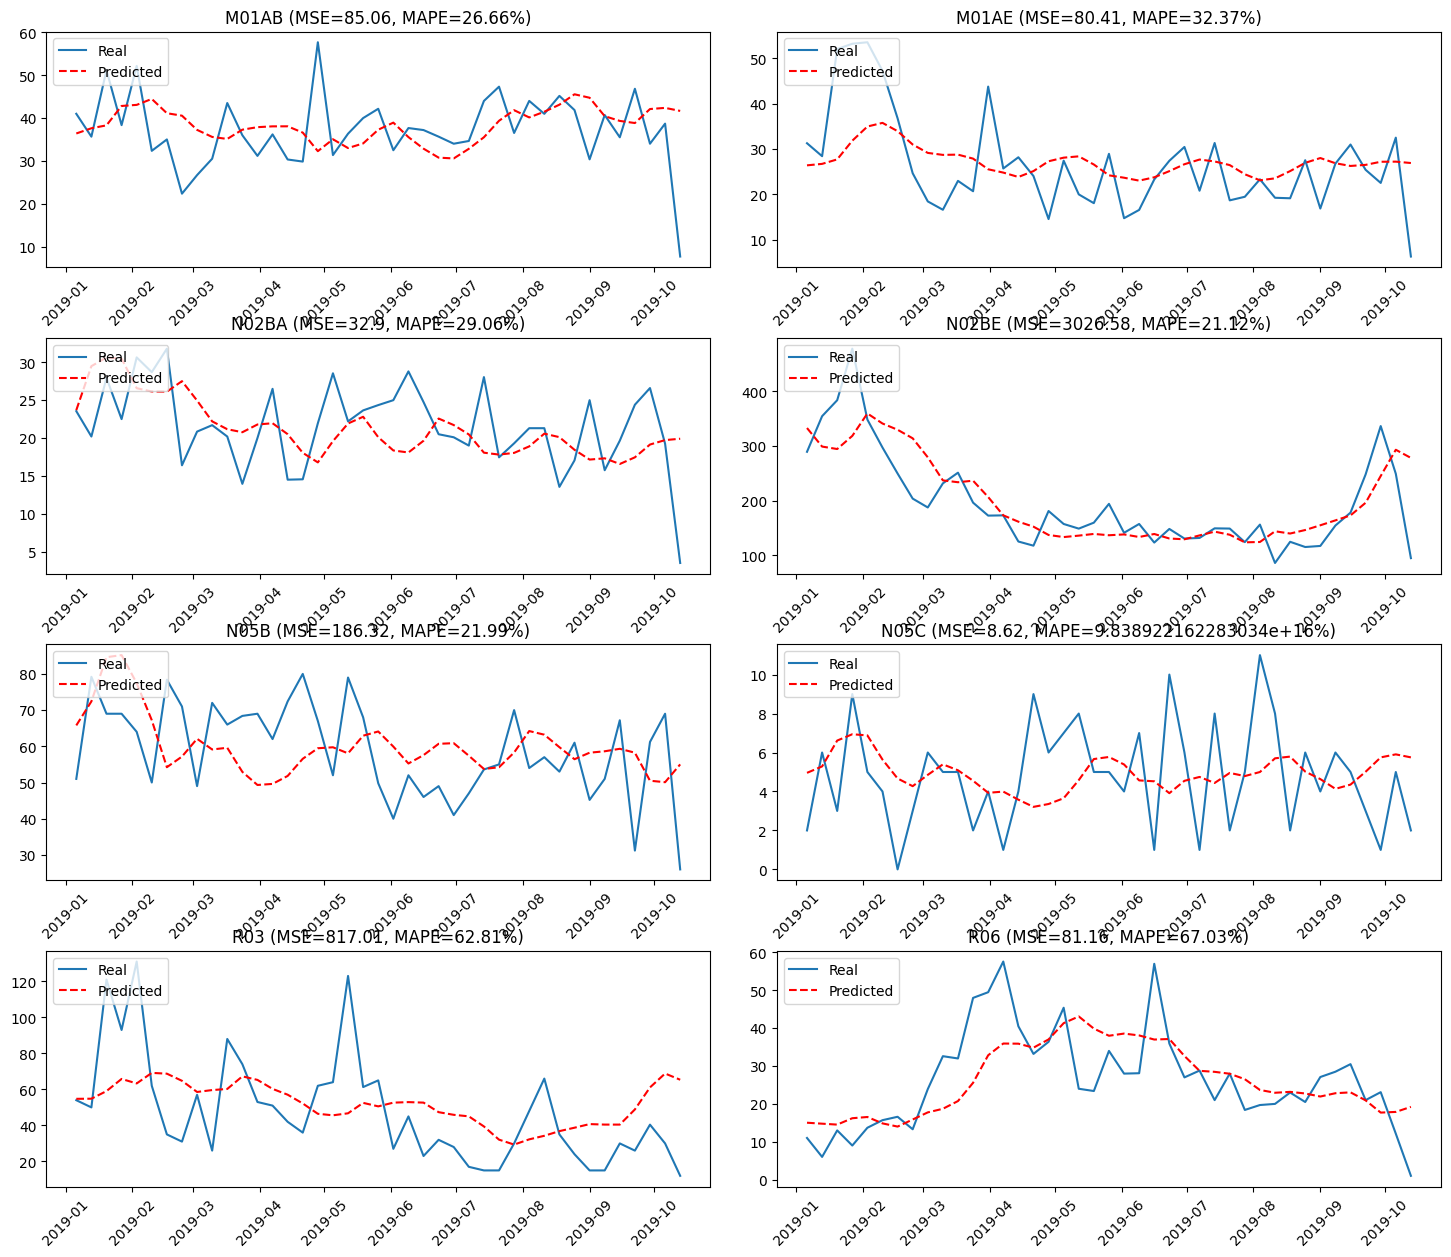

In [14]:

import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid

df = pd.read_csv('salesweekly.csv')

subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

M01AB = {'series': 'M01AB', 'params_grid': {'changepoint_prior_scale': 30, 'interval_width': 0.0005}}
M01AE = {'series': 'M01AE', 'params_grid': {'changepoint_prior_scale': 0.05, 'interval_width': 0.0005}}
N02BA = {'series': 'N02BA', 'params_grid': {'changepoint_prior_scale': 0.005, 'interval_width': 0.0005}}
N02BE = {'series': 'N02BE', 'params_grid': {'changepoint_prior_scale': 10, 'seasonality_prior_scale': 170, 'interval_width': 0.0005}}
N05B = {'series': 'N05B', 'params_grid': {'changepoint_prior_scale': 5, 'interval_width': 0.0005}}
N05C = {'series': 'N05C', 'params_grid': {'changepoint_prior_scale': 0.5, 'interval_width': 0.005}}
R03 = {'series': 'R03', 'params_grid': {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 160, 'interval_width': 0.0005}}
R06 = {'series': 'R06', 'params_grid': {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 120, 'interval_width': 0.0005}}

r = [M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, R06]
parameterlist = [{'series': col} for col in df.columns if col not in ['Week', 'datum']]

resultsRollingdf = pd.DataFrame(
    index=['Prophet MSE', 'Prophet MAPE'],
    columns=[x['series'] for x in parameterlist]
)

for x in r:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)

    dfg = df[['datum', x['series']]]
    dfg['datum'] = pd.to_datetime(dfg['datum'], format='%m/%d/%Y')  # ensure dates
    dfg = dfg.rename(columns={'datum': 'ds', x['series']: 'y'})

    size = len(dfg) - 50
    dfgtrain = dfg.loc[0:size, :]
    dfgtest = dfg.loc[size+1:len(dfg), :]
    history = dfgtrain.copy()
    predictions = []

    for t in dfgtest['ds'].values:
        model = Prophet(
            changepoint_prior_scale=x['params_grid']['changepoint_prior_scale'],
            growth='linear',
            interval_width=x['params_grid']['interval_width'],
            daily_seasonality=False,
            weekly_seasonality=False
        )

        if x['series'] in ['N02BE', 'R03', 'R06']:
            model = model.add_seasonality(
                name='yearly',
                period=365.25,
                prior_scale=x['params_grid']['seasonality_prior_scale'],
                fourier_order=13
            )

        model_fit = model.fit(history)
        future = model.make_future_dataframe(periods=1, freq='W')
        output = model.predict(future)

        yhat = output.loc[output.ds == t, 'yhat'].values[0]
        predictions.append(yhat)

        obs = dfgtest.loc[dfgtest.ds == t, 'y'].values[0]
        dd = pd.DataFrame([[t, obs]], columns=['ds', 'y'])
        history = pd.concat([history, dd], ignore_index=True)

    error = mean_squared_error(dfgtest['y'].values, predictions)
    perror = mean_absolute_percentage_error(dfgtest['y'].values, predictions) * 100

    resultsRollingdf.loc['Prophet MSE', x['series']] = error
    resultsRollingdf.loc['Prophet MAPE', x['series']] = perror

    # Filter data to show only the first 10 months of 2019
    start_date = '2019-01-01'
    end_date = '2019-10-31'

    dfgtest_filtered = dfgtest[(dfgtest['ds'] >= start_date) & (dfgtest['ds'] <= end_date)]
    predictions_filtered = [pred for pred, ds in zip(predictions, dfgtest['ds']) if ds >= pd.Timestamp(start_date) and ds <= pd.Timestamp(end_date)]

    ax[rowindex, colindex].set_title(
        x['series'] + ' (MSE=' + str(round(error, 2)) +
        ', MAPE=' + str(round(perror, 2)) + '%)'
    )

    ax[rowindex, colindex].plot(dfgtest_filtered['ds'], dfgtest_filtered['y'].values, label="Real")
    ax[rowindex, colindex].plot(dfgtest_filtered['ds'], predictions_filtered, color='red', linestyle='--', label="Predicted")

    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')

    # Format x-axis to show month-wise ticks and labels
    ax[rowindex, colindex].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax[rowindex, colindex].tick_params(axis='x', rotation=45)

    subplotindex = subplotindex + 1

plt.show()
